<a href="https://colab.research.google.com/github/Fernando-cfs/criptomoedas/blob/main/analisecriptomoedas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Relatório das Criptomoedas**

Faremos um ralatório sobre os valores das criptomoedas dos anos de "2013 a 2021" os dados foram coletados
do Kaggle (https://www.kaggle.com/datasets/sudalairajkumar/cryptocurrencypricehistory) para Realizar
uma análise exploratória histórica dos valores de criptomoedas.

<font size=5><a name="indice"></a> Análise deve responder às seguintes perguntas:

- [1. Como se comportaram os valores para todas as criptomoedas? Os valores tiveram uma tendência de queda ou de aumento?](#section_1)
- [2. Quais os valores médios para todas as criptomoedas?](#section_2)
- [3. Em quais anos houve maiores quedas e valorizações?](#section_3)
- [4. Existe alguma tendência de aumento ou queda dos valores pelo dia da semana?](#section_4)
- [5. Qual moeda se mostra mais interessante em relação à valorização pela análise da série histórica?](#section_5)
- [6. Qual moeda se mostra menos interessante em relação à valorização pela análise da série histórica?](#section_6)
- [7. Existe correlação entre os valores para todas as criptomoedas?](#section_7)
- [8. Qual é a volatilidade média das criptomoedas ao longo do tempo e como essa volatilidade se compara entre as diferentes moedas?](#section_8)
- [9. Existe alguma relação entre a capitalização de mercado de uma criptomoeda e sua tendência de valorização? Por exemplo, as criptomoedas com maior capitalização de mercado tendem a se valorizar mais do que as de menor capitalização?](#section_9)
- [10. Verificando os maiores valores de fechamento do bitcoin em cada ano](#section_10)
- [Dashboard.](#section_11)

Analisar os preços das criptomoedas ajuda a prever os melhores senários de investimento nesse mercado que se valoriza a cada ano, vamos analisar as seguintes criptomoedas

- O que são criptomoedas:
Genericamente, uma criptomoeda é um tipo de dinheiro – como outras moedas com as quais convivemos cotidianamente
com a diferença de ser totalmente digital. Além disso, ela não emitida por nenhum governo
(como é o caso do real ou do dólar, por exemplo).
segundo o Infomoney (https://www.infomoney.com.br/guias/criptomoedas/)


- As criptomoedas que serão analisadas Nome e Símbolo:

Aave (AAVE)

Binance Coin (BNB)

Bitcoin (BTC)

Cardano (ADA)

Chainlink (LINK)

Cosmos (ATOM)

Crypto.com Coin (CRO)

Dogecoin (DOGE)

EOS (EOS)

Ethereum (ETH)


In [1]:
# importa bibliotecas
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

- Importação dos 10 pares de moedas

In [2]:
url ='https://github.com/Fernando-cfs/criptomoedas/raw/main/archive/coin_Aave.csv'

aave = pd.read_csv(url)
aave

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,1,Aave,AAVE,2020-10-05 23:59:59,55.112358,49.787900,52.675035,53.219243,0.000000e+00,8.912813e+07
1,2,Aave,AAVE,2020-10-06 23:59:59,53.402270,40.734578,53.291969,42.401599,5.830915e+05,7.101144e+07
2,3,Aave,AAVE,2020-10-07 23:59:59,42.408314,35.970690,42.399947,40.083976,6.828342e+05,6.713004e+07
3,4,Aave,AAVE,2020-10-08 23:59:59,44.902511,36.696057,39.885262,43.764463,1.658817e+06,2.202651e+08
4,5,Aave,AAVE,2020-10-09 23:59:59,47.569533,43.291776,43.764463,46.817744,8.155377e+05,2.356322e+08
...,...,...,...,...,...,...,...,...,...,...
270,271,Aave,AAVE,2021-07-02 23:59:59,234.483957,215.951539,230.814119,233.948437,2.566395e+08,3.001542e+09
271,272,Aave,AAVE,2021-07-03 23:59:59,265.107342,228.485206,234.208478,259.655225,3.853778e+08,3.331546e+09
272,273,Aave,AAVE,2021-07-04 23:59:59,289.001124,248.285491,259.399426,277.038792,4.275719e+08,3.555054e+09
273,274,Aave,AAVE,2021-07-05 23:59:59,317.387234,263.433881,277.110533,307.829079,7.931409e+08,3.950269e+09


In [3]:
url = 'https://github.com/Fernando-cfs/criptomoedas/raw/main/archive/coin_BinanceCoin.csv'
binance = pd.read_csv(url)
binance


,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,1,Binance Coin,BNB,2017-07-26 23:59:59,0.109013,0.099266,0.105893,0.105138,2.003950e+05,1.051380e+07
1,2,Binance Coin,BNB,2017-07-27 23:59:59,0.108479,0.100888,0.105108,0.107737,3.444990e+05,1.077370e+07
2,3,Binance Coin,BNB,2017-07-28 23:59:59,0.109019,0.101473,0.107632,0.104067,3.425680e+05,1.040670e+07
3,4,Binance Coin,BNB,2017-07-29 23:59:59,0.111264,0.101108,0.104782,0.107811,3.402180e+05,1.078110e+07
4,5,Binance Coin,BNB,2017-07-30 23:59:59,0.108138,0.103162,0.107935,0.106414,2.242610e+05,1.064140e+07
...,...,...,...,...,...,...,...,...,...,...
1437,1438,Binance Coin,BNB,2021-07-02 23:59:59,290.621683,277.350302,287.754456,287.423094,1.133633e+09,4.410016e+10
1438,1439,Binance Coin,BNB,2021-07-03 23:59:59,302.605867,283.434010,287.215592,298.237117,1.113777e+09,4.575938e+10
1439,1440,Binance Coin,BNB,2021-07-04 23:59:59,314.713019,292.787370,298.113557,307.732096,1.387396e+09,4.721623e+10
1440,1441,Binance Coin,BNB,2021-07-05 23:59:59,307.684855,293.523465,307.684855,302.377980,1.504870e+09,4.639473e+10


In [4]:
url = 'https://raw.githubusercontent.com/Fernando-cfs/criptomoedas/main/archive/coin_Bitcoin.csv'
bit = pd.read_csv(url)
bit

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,1,Bitcoin,BTC,2013-04-29 23:59:59,147.488007,134.000000,134.444000,144.539993,0.000000e+00,1.603769e+09
1,2,Bitcoin,BTC,2013-04-30 23:59:59,146.929993,134.050003,144.000000,139.000000,0.000000e+00,1.542813e+09
2,3,Bitcoin,BTC,2013-05-01 23:59:59,139.889999,107.720001,139.000000,116.989998,0.000000e+00,1.298955e+09
3,4,Bitcoin,BTC,2013-05-02 23:59:59,125.599998,92.281898,116.379997,105.209999,0.000000e+00,1.168517e+09
4,5,Bitcoin,BTC,2013-05-03 23:59:59,108.127998,79.099998,106.250000,97.750000,0.000000e+00,1.085995e+09
...,...,...,...,...,...,...,...,...,...,...
2986,2987,Bitcoin,BTC,2021-07-02 23:59:59,33939.588699,32770.680780,33549.600177,33897.048590,3.872897e+10,6.354508e+11
2987,2988,Bitcoin,BTC,2021-07-03 23:59:59,34909.259899,33402.696536,33854.421362,34668.548402,2.438396e+10,6.499397e+11
2988,2989,Bitcoin,BTC,2021-07-04 23:59:59,35937.567147,34396.477458,34665.564866,35287.779766,2.492431e+10,6.615748e+11
2989,2990,Bitcoin,BTC,2021-07-05 23:59:59,35284.344430,33213.661034,35284.344430,33746.002456,2.672155e+10,6.326962e+11


In [5]:
url = 'https://github.com/Fernando-cfs/criptomoedas/raw/main/archive/coin_Cardano.csv'
cardano = pd.read_csv(url)
cardano

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,1,Cardano,ADA,2017-10-02 23:59:59,0.030088,0.019969,0.024607,0.025932,5.764130e+07,6.288991e+08
1,2,Cardano,ADA,2017-10-03 23:59:59,0.027425,0.020690,0.025757,0.020816,1.699780e+07,5.396927e+08
2,3,Cardano,ADA,2017-10-04 23:59:59,0.022806,0.020864,0.020864,0.021931,9.000050e+06,5.686195e+08
3,4,Cardano,ADA,2017-10-05 23:59:59,0.022154,0.020859,0.021951,0.021489,5.562510e+06,5.571390e+08
4,5,Cardano,ADA,2017-10-06 23:59:59,0.021542,0.018360,0.021359,0.018539,7.780710e+06,4.806646e+08
...,...,...,...,...,...,...,...,...,...,...
1369,1370,Cardano,ADA,2021-07-02 23:59:59,1.394397,1.286607,1.332942,1.394397,2.159410e+09,4.454587e+10
1370,1371,Cardano,ADA,2021-07-03 23:59:59,1.441714,1.359664,1.394152,1.406836,2.028094e+09,4.494324e+10
1371,1372,Cardano,ADA,2021-07-04 23:59:59,1.493717,1.382153,1.404008,1.458184,1.806362e+09,4.658364e+10
1372,1373,Cardano,ADA,2021-07-05 23:59:59,1.461221,1.379284,1.461221,1.404898,1.759461e+09,4.488134e+10


In [6]:
url = 'https://github.com/Fernando-cfs/criptomoedas/raw/main/archive/coin_ChainLink.csv'
chain = pd.read_csv(url)
chain

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,1,Chainlink,LINK,2017-09-21 23:59:59,0.207892,0.155292,0.189132,0.169680,2.126270e+06,5.938800e+07
1,2,Chainlink,LINK,2017-09-22 23:59:59,0.181675,0.139869,0.169826,0.150503,1.423220e+06,5.267605e+07
2,3,Chainlink,LINK,2017-09-23 23:59:59,0.157440,0.126297,0.149562,0.131129,1.186670e+06,4.589515e+07
3,4,Chainlink,LINK,2017-09-24 23:59:59,0.190250,0.130275,0.131110,0.170278,1.025740e+06,5.959730e+07
4,5,Chainlink,LINK,2017-09-25 23:59:59,0.182637,0.158580,0.170636,0.182198,1.021370e+06,6.376930e+07
...,...,...,...,...,...,...,...,...,...,...
1380,1381,Chainlink,LINK,2021-07-02 23:59:59,18.520256,17.305501,18.220669,18.283561,6.865419e+08,7.990091e+09
1381,1382,Chainlink,LINK,2021-07-03 23:59:59,18.886003,17.898075,18.285458,18.538818,5.090763e+08,8.101641e+09
1382,1383,Chainlink,LINK,2021-07-04 23:59:59,19.894503,18.028957,18.548805,19.262838,6.802681e+08,8.418044e+09
1383,1384,Chainlink,LINK,2021-07-05 23:59:59,19.246891,17.814752,19.246891,18.371589,6.986191e+08,8.028560e+09


In [7]:
url = 'https://github.com/Fernando-cfs/criptomoedas/raw/main/archive/coin_Cosmos.csv'
cosmo = pd.read_csv(url)
cosmo

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,1,Cosmos,ATOM,2019-03-15 23:59:59,7.715249,6.432468,6.633174,7.504351,6.057301e+06,0.000000e+00
1,2,Cosmos,ATOM,2019-03-16 23:59:59,8.305615,6.694531,7.507990,7.383882,3.477393e+06,0.000000e+00
2,3,Cosmos,ATOM,2019-03-17 23:59:59,7.357443,4.727895,7.357443,4.776164,2.653565e+06,0.000000e+00
3,4,Cosmos,ATOM,2019-03-18 23:59:59,5.229982,4.828242,4.828242,5.110341,2.567201e+06,0.000000e+00
4,5,Cosmos,ATOM,2019-03-19 23:59:59,5.206172,4.794501,5.099978,4.821883,3.891084e+06,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...
840,841,Cosmos,ATOM,2021-07-02 23:59:59,11.764925,10.543935,11.048080,11.764925,1.891418e+08,2.559039e+09
841,842,Cosmos,ATOM,2021-07-03 23:59:59,12.198276,11.540298,11.791034,11.817927,1.551317e+08,2.571184e+09
842,843,Cosmos,ATOM,2021-07-04 23:59:59,12.433965,11.520693,11.799601,12.263548,1.449177e+08,2.668775e+09
843,844,Cosmos,ATOM,2021-07-05 23:59:59,13.968271,11.955753,12.320437,13.548475,4.489358e+08,2.949102e+09


In [8]:
url = 'https://github.com/Fernando-cfs/criptomoedas/raw/main/archive/coin_CryptocomCoin.csv'
crypto = pd.read_csv(url)
crypto

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,1,Crypto.com Coin,CRO,2018-12-15 23:59:59,0.019845,0.016150,0.019542,0.017243,9.897096e+05,0.000000e+00
1,2,Crypto.com Coin,CRO,2018-12-16 23:59:59,0.017496,0.014127,0.017213,0.015301,7.171740e+05,0.000000e+00
2,3,Crypto.com Coin,CRO,2018-12-17 23:59:59,0.016723,0.011487,0.015186,0.014448,6.156226e+05,1.547062e+07
3,4,Crypto.com Coin,CRO,2018-12-18 23:59:59,0.017215,0.013553,0.014308,0.016260,7.644745e+05,1.785590e+07
4,5,Crypto.com Coin,CRO,2018-12-19 23:59:59,0.031509,0.015609,0.016087,0.020790,1.025196e+06,2.340088e+07
...,...,...,...,...,...,...,...,...,...,...
930,931,Crypto.com Coin,CRO,2021-07-02 23:59:59,0.114202,0.108968,0.112168,0.113914,4.495990e+07,2.877801e+09
931,932,Crypto.com Coin,CRO,2021-07-03 23:59:59,0.119593,0.112773,0.113903,0.118407,4.578038e+07,2.991307e+09
932,933,Crypto.com Coin,CRO,2021-07-04 23:59:59,0.125262,0.117165,0.118389,0.122427,4.174486e+07,3.092883e+09
933,934,Crypto.com Coin,CRO,2021-07-05 23:59:59,0.122467,0.113482,0.122467,0.115814,4.728913e+07,2.925805e+09


In [9]:
url = 'https://github.com/Fernando-cfs/criptomoedas/raw/main/archive/coin_Dogecoin.csv'
dogecoin = pd.read_csv(url)
dogecoin

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,1,Dogecoin,DOGE,2013-12-16 23:59:59,0.000866,0.000150,0.000299,0.000205,0.000000e+00,1.509085e+06
1,2,Dogecoin,DOGE,2013-12-17 23:59:59,0.000289,0.000116,0.000207,0.000269,0.000000e+00,2.169688e+06
2,3,Dogecoin,DOGE,2013-12-18 23:59:59,0.000362,0.000205,0.000267,0.000362,0.000000e+00,3.188943e+06
3,4,Dogecoin,DOGE,2013-12-19 23:59:59,0.001520,0.000328,0.000395,0.001162,0.000000e+00,1.115034e+07
4,5,Dogecoin,DOGE,2013-12-20 23:59:59,0.001143,0.000662,0.001143,0.000704,0.000000e+00,7.284337e+06
...,...,...,...,...,...,...,...,...,...,...
2755,2756,Dogecoin,DOGE,2021-07-02 23:59:59,0.247997,0.238848,0.243982,0.245264,1.321471e+09,3.194925e+10
2756,2757,Dogecoin,DOGE,2021-07-03 23:59:59,0.250214,0.242454,0.245106,0.246411,9.170158e+08,3.210491e+10
2757,2758,Dogecoin,DOGE,2021-07-04 23:59:59,0.252567,0.243425,0.246425,0.246483,9.735115e+08,3.211767e+10
2758,2759,Dogecoin,DOGE,2021-07-05 23:59:59,0.246419,0.227838,0.246419,0.231614,1.267949e+09,3.018344e+10


In [10]:
url = 'https://github.com/Fernando-cfs/criptomoedas/raw/main/archive/coin_EOS.csv'
eos = pd.read_csv(url)
eos

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,1,EOS,EOS,2017-07-02 23:59:59,2.877510,0.822648,0.996521,2.710050,3.204520e+08,0.000000e+00
1,2,EOS,EOS,2017-07-03 23:59:59,5.395970,2.632310,2.717390,4.086640,4.149500e+08,6.549307e+08
2,3,EOS,EOS,2017-07-04 23:59:59,4.191240,2.933450,4.098010,3.372000,2.185590e+08,5.501552e+08
3,4,EOS,EOS,2017-07-05 23:59:59,3.523500,2.730130,3.356000,3.003230,1.243390e+08,5.006264e+08
4,5,EOS,EOS,2017-07-06 23:59:59,3.867470,3.007830,3.014260,3.361330,1.774630e+08,5.683615e+08
...,...,...,...,...,...,...,...,...,...,...
1461,1462,EOS,EOS,2021-07-02 23:59:59,4.000508,3.751986,3.930561,3.934325,1.014258e+09,3.756672e+09
1462,1463,EOS,EOS,2021-07-03 23:59:59,4.060837,3.859586,3.926595,4.046421,7.302703e+08,3.863820e+09
1463,1464,EOS,EOS,2021-07-04 23:59:59,4.181861,3.952532,4.048645,4.059930,8.086025e+08,3.876834e+09
1464,1465,EOS,EOS,2021-07-05 23:59:59,4.061888,3.773130,4.061888,3.819266,8.004033e+08,3.647131e+09


In [11]:
url = 'https://github.com/Fernando-cfs/criptomoedas/raw/main/archive/coin_Ethereum.csv'
ethereum = pd.read_csv(url)
ethereum

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,1,Ethereum,ETH,2015-08-08 23:59:59,2.798810,0.714725,2.793760,0.753325,6.741880e+05,4.548689e+07
1,2,Ethereum,ETH,2015-08-09 23:59:59,0.879810,0.629191,0.706136,0.701897,5.321700e+05,4.239957e+07
2,3,Ethereum,ETH,2015-08-10 23:59:59,0.729854,0.636546,0.713989,0.708448,4.052830e+05,4.281836e+07
3,4,Ethereum,ETH,2015-08-11 23:59:59,1.131410,0.663235,0.708087,1.067860,1.463100e+06,6.456929e+07
4,5,Ethereum,ETH,2015-08-12 23:59:59,1.289940,0.883608,1.058750,1.217440,2.150620e+06,7.364501e+07
...,...,...,...,...,...,...,...,...,...,...
2155,2156,Ethereum,ETH,2021-07-02 23:59:59,2155.596496,2021.824808,2109.892677,2150.040364,3.179621e+10,2.505527e+11
2156,2157,Ethereum,ETH,2021-07-03 23:59:59,2237.567155,2117.590013,2150.835025,2226.114282,1.743336e+10,2.594475e+11
2157,2158,Ethereum,ETH,2021-07-04 23:59:59,2384.286857,2190.837703,2226.550382,2321.724112,1.878711e+10,2.706217e+11
2158,2159,Ethereum,ETH,2021-07-05 23:59:59,2321.922836,2163.041394,2321.922836,2198.582464,2.010379e+10,2.562978e+11


* Concatenando os 10 DataFrames em 1

In [12]:

criptomoedas = pd.concat([aave, binance, bit, cardano, chain, cosmo, crypto, dogecoin, eos, ethereum], ignore_index=True)
criptomoedas

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,1,Aave,AAVE,2020-10-05 23:59:59,55.112358,49.787900,52.675035,53.219243,0.000000e+00,8.912813e+07
1,2,Aave,AAVE,2020-10-06 23:59:59,53.402270,40.734578,53.291969,42.401599,5.830915e+05,7.101144e+07
2,3,Aave,AAVE,2020-10-07 23:59:59,42.408314,35.970690,42.399947,40.083976,6.828342e+05,6.713004e+07
3,4,Aave,AAVE,2020-10-08 23:59:59,44.902511,36.696057,39.885262,43.764463,1.658817e+06,2.202651e+08
4,5,Aave,AAVE,2020-10-09 23:59:59,47.569533,43.291776,43.764463,46.817744,8.155377e+05,2.356322e+08
...,...,...,...,...,...,...,...,...,...,...
15628,2156,Ethereum,ETH,2021-07-02 23:59:59,2155.596496,2021.824808,2109.892677,2150.040364,3.179621e+10,2.505527e+11
15629,2157,Ethereum,ETH,2021-07-03 23:59:59,2237.567155,2117.590013,2150.835025,2226.114282,1.743336e+10,2.594475e+11
15630,2158,Ethereum,ETH,2021-07-04 23:59:59,2384.286857,2190.837703,2226.550382,2321.724112,1.878711e+10,2.706217e+11
15631,2159,Ethereum,ETH,2021-07-05 23:59:59,2321.922836,2163.041394,2321.922836,2198.582464,2.010379e+10,2.562978e+11


In [13]:
tb_criptomoedas = criptomoedas.drop(columns=['SNo'])
tb_criptomoedas

,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,Aave,AAVE,2020-10-05 23:59:59,55.112358,49.787900,52.675035,53.219243,0.000000e+00,8.912813e+07
1,Aave,AAVE,2020-10-06 23:59:59,53.402270,40.734578,53.291969,42.401599,5.830915e+05,7.101144e+07
2,Aave,AAVE,2020-10-07 23:59:59,42.408314,35.970690,42.399947,40.083976,6.828342e+05,6.713004e+07
3,Aave,AAVE,2020-10-08 23:59:59,44.902511,36.696057,39.885262,43.764463,1.658817e+06,2.202651e+08
4,Aave,AAVE,2020-10-09 23:59:59,47.569533,43.291776,43.764463,46.817744,8.155377e+05,2.356322e+08
...,...,...,...,...,...,...,...,...,...
15628,Ethereum,ETH,2021-07-02 23:59:59,2155.596496,2021.824808,2109.892677,2150.040364,3.179621e+10,2.505527e+11
15629,Ethereum,ETH,2021-07-03 23:59:59,2237.567155,2117.590013,2150.835025,2226.114282,1.743336e+10,2.594475e+11
15630,Ethereum,ETH,2021-07-04 23:59:59,2384.286857,2190.837703,2226.550382,2321.724112,1.878711e+10,2.706217e+11
15631,Ethereum,ETH,2021-07-05 23:59:59,2321.922836,2163.041394,2321.922836,2198.582464,2.010379e+10,2.562978e+11


- Abaixo vou renomear as colunas para facilitar a análise

* `Data:` data da observação
* `Abertura:` preço de abertura
* `Alto:` Preço mais alto
* `Baixo:` Preço mais baixo
* `Fechamento:` Preço de fechamento
* `Volume:` Volume de transações
* `Capitalização de mercado:` Capitalização de mercado em dólares americanos

In [14]:
mapeamento_colunas = {
    'Name': 'nome',
    'Symbol': 'simbolo',
    'Date': 'data',
    'High': 'alto',
    'Low': 'baixo',
    'Open': 'abertura',
    'Close': 'fechamento',
    'Volume': 'volume',
    'Marketcap': 'capitalizacao_de_mercado'
}

# Renomear as colunas
tb_criptomoedas = tb_criptomoedas.rename(columns=mapeamento_colunas)

tb_criptomoedas







,nome,simbolo,data,alto,baixo,abertura,fechamento,volume,capitalizacao_de_mercado
0,Aave,AAVE,2020-10-05 23:59:59,55.112358,49.787900,52.675035,53.219243,0.000000e+00,8.912813e+07
1,Aave,AAVE,2020-10-06 23:59:59,53.402270,40.734578,53.291969,42.401599,5.830915e+05,7.101144e+07
2,Aave,AAVE,2020-10-07 23:59:59,42.408314,35.970690,42.399947,40.083976,6.828342e+05,6.713004e+07
3,Aave,AAVE,2020-10-08 23:59:59,44.902511,36.696057,39.885262,43.764463,1.658817e+06,2.202651e+08
4,Aave,AAVE,2020-10-09 23:59:59,47.569533,43.291776,43.764463,46.817744,8.155377e+05,2.356322e+08
...,...,...,...,...,...,...,...,...,...
15628,Ethereum,ETH,2021-07-02 23:59:59,2155.596496,2021.824808,2109.892677,2150.040364,3.179621e+10,2.505527e+11
15629,Ethereum,ETH,2021-07-03 23:59:59,2237.567155,2117.590013,2150.835025,2226.114282,1.743336e+10,2.594475e+11
15630,Ethereum,ETH,2021-07-04 23:59:59,2384.286857,2190.837703,2226.550382,2321.724112,1.878711e+10,2.706217e+11
15631,Ethereum,ETH,2021-07-05 23:59:59,2321.922836,2163.041394,2321.922836,2198.582464,2.010379e+10,2.562978e+11


In [15]:
tb_criptomoedas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15633 entries, 0 to 15632
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   nome                      15633 non-null  object 
 1   simbolo                   15633 non-null  object 
 2   data                      15633 non-null  object 
 3   alto                      15633 non-null  float64
 4   baixo                     15633 non-null  float64
 5   abertura                  15633 non-null  float64
 6   fechamento                15633 non-null  float64
 7   volume                    15633 non-null  float64
 8   capitalizacao_de_mercado  15633 non-null  float64
dtypes: float64(6), object(3)
memory usage: 1.1+ MB


* Tratando a coluna Data que esta como object para data

In [16]:
tb_criptomoedas['data'] = pd.to_datetime(tb_criptomoedas['data'])
tb_criptomoedas['data'] = tb_criptomoedas['data'].dt.strftime('%d/%m/%y')
tb_criptomoedas


,nome,simbolo,data,alto,baixo,abertura,fechamento,volume,capitalizacao_de_mercado
0,Aave,AAVE,05/10/20,55.112358,49.787900,52.675035,53.219243,0.000000e+00,8.912813e+07
1,Aave,AAVE,06/10/20,53.402270,40.734578,53.291969,42.401599,5.830915e+05,7.101144e+07
2,Aave,AAVE,07/10/20,42.408314,35.970690,42.399947,40.083976,6.828342e+05,6.713004e+07
3,Aave,AAVE,08/10/20,44.902511,36.696057,39.885262,43.764463,1.658817e+06,2.202651e+08
4,Aave,AAVE,09/10/20,47.569533,43.291776,43.764463,46.817744,8.155377e+05,2.356322e+08
...,...,...,...,...,...,...,...,...,...
15628,Ethereum,ETH,02/07/21,2155.596496,2021.824808,2109.892677,2150.040364,3.179621e+10,2.505527e+11
15629,Ethereum,ETH,03/07/21,2237.567155,2117.590013,2150.835025,2226.114282,1.743336e+10,2.594475e+11
15630,Ethereum,ETH,04/07/21,2384.286857,2190.837703,2226.550382,2321.724112,1.878711e+10,2.706217e+11
15631,Ethereum,ETH,05/07/21,2321.922836,2163.041394,2321.922836,2198.582464,2.010379e+10,2.562978e+11


In [17]:
# Criando nome para coluna de índices
tb_criptomoedas.index.name = 'id'
tb_criptomoedas

,nome,simbolo,data,alto,baixo,abertura,fechamento,volume,capitalizacao_de_mercado
id,,,,,,,,,
0,Aave,AAVE,05/10/20,55.112358,49.787900,52.675035,53.219243,0.000000e+00,8.912813e+07
1,Aave,AAVE,06/10/20,53.402270,40.734578,53.291969,42.401599,5.830915e+05,7.101144e+07
2,Aave,AAVE,07/10/20,42.408314,35.970690,42.399947,40.083976,6.828342e+05,6.713004e+07
3,Aave,AAVE,08/10/20,44.902511,36.696057,39.885262,43.764463,1.658817e+06,2.202651e+08
4,Aave,AAVE,09/10/20,47.569533,43.291776,43.764463,46.817744,8.155377e+05,2.356322e+08
...,...,...,...,...,...,...,...,...,...
15628,Ethereum,ETH,02/07/21,2155.596496,2021.824808,2109.892677,2150.040364,3.179621e+10,2.505527e+11
15629,Ethereum,ETH,03/07/21,2237.567155,2117.590013,2150.835025,2226.114282,1.743336e+10,2.594475e+11
15630,Ethereum,ETH,04/07/21,2384.286857,2190.837703,2226.550382,2321.724112,1.878711e+10,2.706217e+11


In [18]:
#criar arquivos .csv com todas as criptomoedas
#tb_criptomoedas.to_csv('dadoscriptomoedas.csv')

- Como o arquivo já foi criado e salvo no github nos comentamos a criação do arquivo para não ficar sempre criando toda vez que é executado

In [19]:
df = tb_criptomoedas

<a name='section_1'></a>
<font size=5, color= red> 1. Como se comportaram os valores para todas as criptomoedas? Os valores tiveram uma tendência de queda ou de aumento?

 - Para análisar como se comportaram os valores, vamos pegar uma média móvel de 20 períodos. A média móvel é um estimador calculado a partir de amostras sequêciais

In [20]:
periodo_media_movel = 20
df['media_movel'] = df['fechamento'].rolling(window=periodo_media_movel).mean()

- Agora vamos calcular o RSI(índice de Força Relativa) que mede a aceleração do movimento dos preços de determinado ativo e dá suas indicações à medida que o movimento diminui a velocidade, dentro da idéia de que é preciso desacelerar para poder mudar de direção.

In [21]:
periodo_rsi = 14

# Calculando as mudanças diárias nos preços de fechamento
df['mudanca'] = df['fechamento'].diff()

#Separando as mudanças postivias e negativas
ganho = df['mudanca'].apply(lambda x: x if x > 0 else 0)
perda = df['mudanca'].apply(lambda x: abs(x) if x < 0 else 0)

# Calculando a média móvel dos ganhos e perda
media_ganhos = ganho.rolling(window=periodo_rsi).mean()
media_perdas = perda.rolling(window=periodo_rsi).mean()

#Calculando o RSI

rsi = 100 - (100 / (1 + (media_ganhos / media_perdas)))

df['rsi'] = rsi


<ipython-input-22-09556e024a0e>:8: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dados_agrupados = df.groupby('ano').mean()


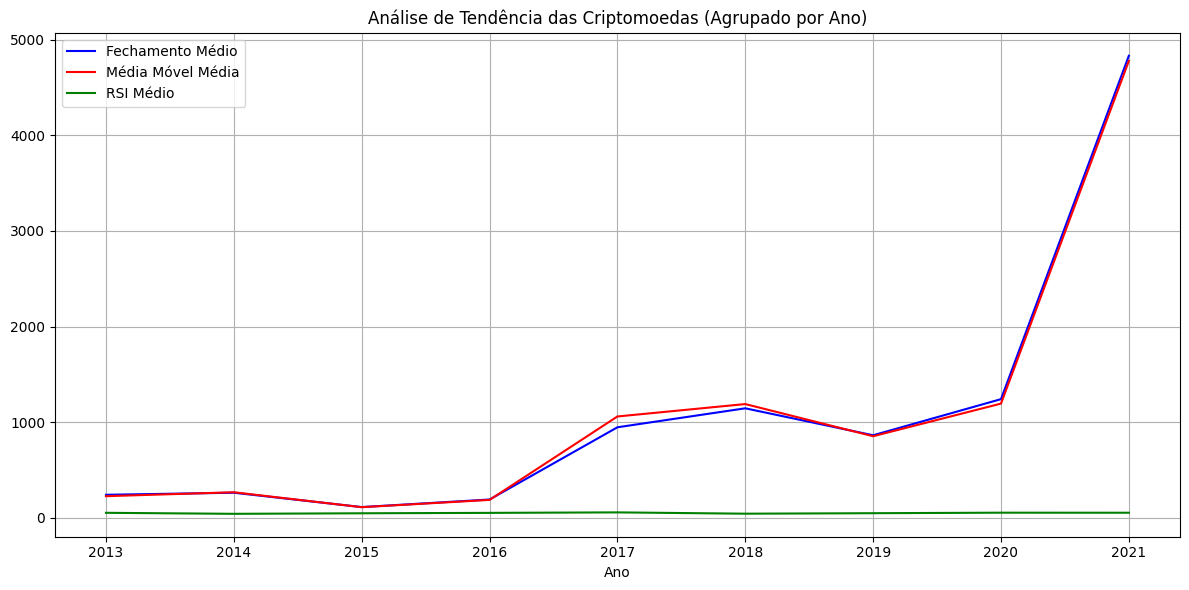

In [22]:
# Tranformando a coluna data em datetime
df['data'] = pd.to_datetime(df['data'])

# Extraindo o ano da coluna 'data'
df['ano'] = df['data'].dt.year

# Agregando os dados por ano e calcular a média apenas para colunas numéricas
dados_agrupados = df.groupby('ano').mean()

# Configurando o tamanho do gráfico
plt.figure(figsize=(12, 6))

# Plotando dos preços de fechamento médios por ano
plt.plot(dados_agrupados.index, dados_agrupados['fechamento'], label='Fechamento Médio', color='blue')

# Plotando da média móvel média por ano
plt.plot(dados_agrupados.index, dados_agrupados['media_movel'], label='Média Móvel Média', color='red')

# Plotando do RSI médio por ano
plt.plot(dados_agrupados.index, dados_agrupados['rsi'], label='RSI Médio', color='green')

plt.xlabel('Ano')
plt.title('Análise de Tendência das Criptomoedas (Agrupado por Ano)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

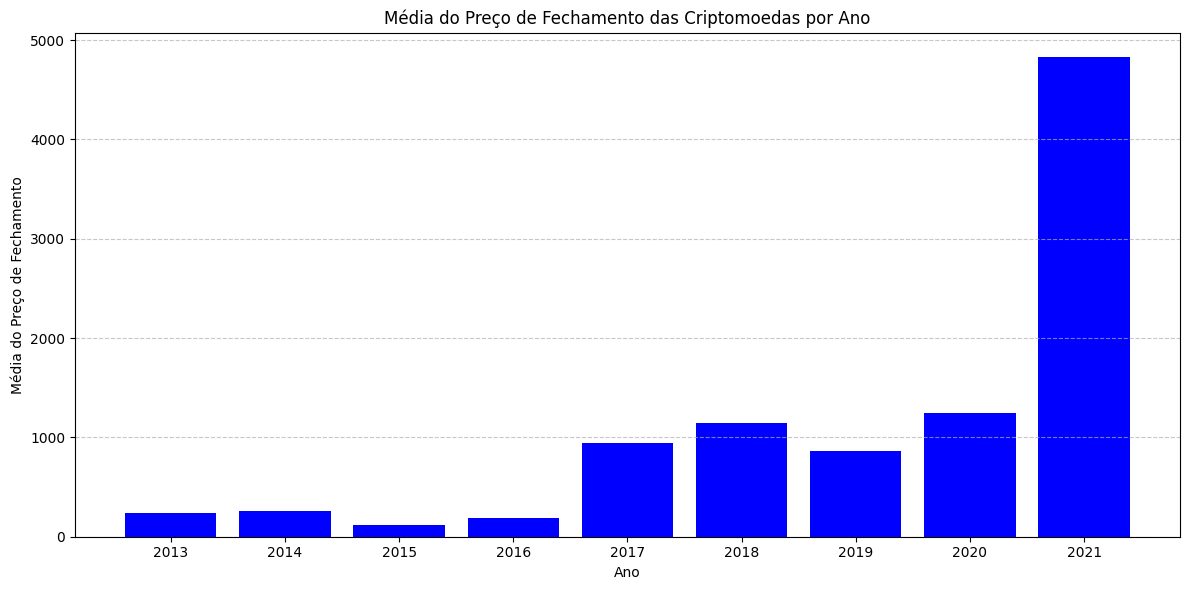

In [23]:
# Configurando o tamanho do gráfico
plt.figure(figsize=(12, 6))

# Criando o gráfico de barras para a coluna 'fechamento'
plt.bar(dados_agrupados.index, dados_agrupados['fechamento'], color='blue')

# Rotulando os eixos
plt.xlabel('Ano')
plt.ylabel('Média do Preço de Fechamento')
plt.title('Média do Preço de Fechamento das Criptomoedas por Ano')

# Rotacionando os rótulos do eixo X para melhor encaixe
plt.xticks(dados_agrupados.index)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

- Podemos observar uma tendência geral de valorização ao longo do período analisado. Essa tendência é evidenciada pelo aumento médio dos preços de fechamento ao longo do tempo, conforme representado no gráfico. Sugerindo um cenário de valorização.

- Além disso, o indicador RSI apresentou uma média que se manteve relativamente constante ao longo do período analisado. Isso indica que, mesmo com as flutuações nos preços, a força relativa das criptomoedas permaneceu em um intervalo estável, sem mostrar sinais de sobrecompra ou sobrevenda significativos.

[Voltar ao índice](#indice)

<a name='section_2'></a>
<font size=5, color= red> 2. Quais os valores médios para todas as criptomoedas?


  - Para verificar os valores médios, vamos buscar os valores médios de todos os momentos, de alta, baixa, abertura e fechamento

In [24]:
media_baixa = df['baixo'].mean().round(2)
media_alta = df['alto'].mean().round(2)
media_abertura = df['abertura'].mean().round(2)
media_fechamento = df['fechamento'].mean().round(2)

In [25]:
print(f'O valor médio das criptos na baixa é: {media_baixa}')
print(f'O valor médio das criptos na alta é: {media_alta}')
print(f'O valor médio das criptos na abertura é: {media_abertura}')
print(f'O valor médio das criptos na fechamento é: {media_fechamento}')

O valor médio das criptos na baixa é: 1301.48
O valor médio das criptos na alta é: 1385.18
O valor médio das criptos na abertura é: 1345.48
O valor médio das criptos na fechamento é: 1347.79


- De acordo com o valor médio geral de todas criptos juntas, já conseguimos tirar um insight de que elas tem um ponto de equilibrio e as baixas e altas não são tão drásticas.

[Voltar ao índice](#indice)

<a name='section_3'></a>
<font size=5, color= red> 3. Em quais anos houve maiores quedas e valorizações?

  - Vamos verificar e visualziar os anos que tiveram maiores quedas e valorizações

In [26]:
# Classificando o DataFrame por data
df.sort_values(by='data', inplace=True)

#Convertendo para datetime
df['data'] = pd.to_datetime(df['data'])

# Criando uma coluna 'Variação_Percentual' que calcule a variação percentual em relação ao ano anterior
df['variação_percentual'] = df['fechamento'].pct_change() * 100

# Agrupando os dados por ano e calcule a variação percentual média para cada ano
variacoes_anuais = df.groupby(df['data'].dt.year)['variação_percentual'].mean()

# Encontrando o ano com a maior valorização
ano_maior_valorizacao = variacoes_anuais.idxmax()
maior_valorizacao = variacoes_anuais.max()

# Encontrando o ano com a maior queda
ano_maior_queda = variacoes_anuais.idxmin()
maior_queda = variacoes_anuais.min()

print(f"Ano de maior valorização: {ano_maior_valorizacao} ({maior_valorizacao:.2f}%)")
print(f"Ano de maior queda: {ano_maior_queda} ({maior_queda:.2f}%)")

Ano de maior valorização: 2014 (66711096.10%)
Ano de maior queda: 2021 (2081419.04%)


- De acordo com a nossa análise o ano que teve a maior valorização das criptos moedas foi no ano 2014, onde tivemos uma valorização de 65209915.62% (Sessenta e cinco milhões, duzentos e nove mil, novecentos e quinze, sessenta e dois.)

- E a maior baixa foi no ano de 2021, onde tivemos uma queda de 1529320.37% (Um milhão, quinhentos e vinte e nove mil, trezentos e vinte, trinta e sete.)

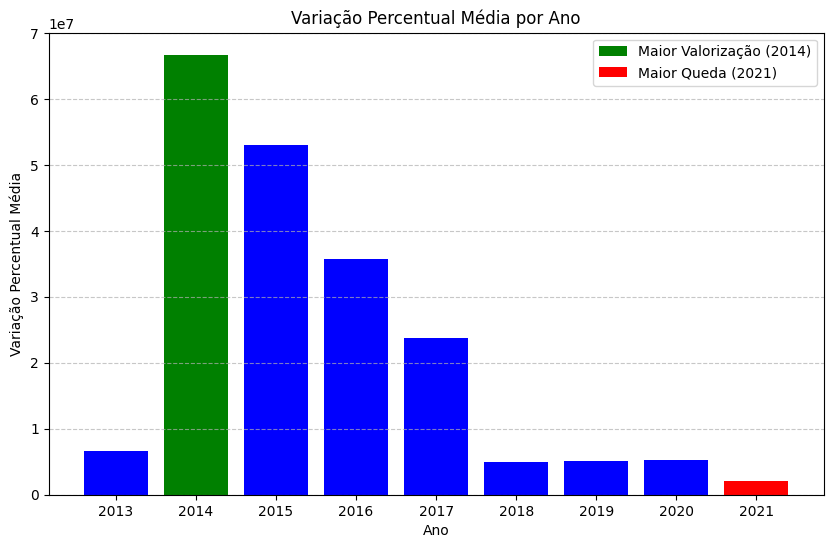

In [27]:
# Criando o gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(variacoes_anuais.index, variacoes_anuais, color='blue')

# Destacando os anos de maior valorização e maior queda
plt.bar(ano_maior_valorizacao, maior_valorizacao, color='green', label=f'Maior Valorização ({ano_maior_valorizacao})')
plt.bar(ano_maior_queda, maior_queda, color='red', label=f'Maior Queda ({ano_maior_queda})')

# Título e rótulos dos eixos
plt.title('Variação Percentual Média por Ano')
plt.xlabel('Ano')
plt.ylabel('Variação Percentual Média')

# Legenda
plt.legend()

# Personalizando rótulos do eixo x para incluir todos os anos
plt.xticks(variacoes_anuais.index)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

[Voltar ao índice](#indice)

<a name='section_4'></a>
<font size=5, color= red> 4. Existe alguma tendência de aumento ou queda dos valores pelo dia da semana?

  -  Análisando as tendências de aumento ou queda dos valores pelos dias da semana


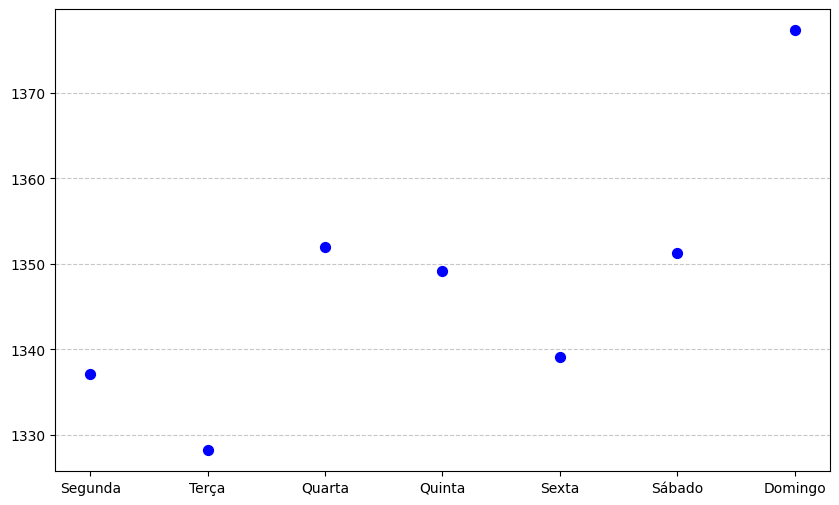

In [28]:
# Extraindo o dia da semana (0 = segunda-feira, 6 = domingo)
df['dia_da_semana'] = df['data'].dt.dayofweek

# Mapeando os números do dia da semana para os nomes dos dias
nomes_dias_semana = {0: 'Segunda', 1: 'Terça', 2: 'Quarta', 3: 'Quinta', 4: 'Sexta', 5: 'Sábado', 6: 'Domingo'}
df['nome_dia_semana'] = df['dia_da_semana'].map(nomes_dias_semana)

# Agrupando os dados por dia da semana e calculando as médias dos valores
media_valores_dia_semana = df.groupby('dia_da_semana')['fechamento'].mean()

# Ordenando os dias da semana na ordem correta
media_valores_dia_semana = media_valores_dia_semana.reindex([0, 1, 2, 3, 4, 5, 6])

# Criando o gráfico de dispersão
plt.figure(figsize=(10, 6))
plt.scatter(media_valores_dia_semana.index, media_valores_dia_semana, color='blue', marker='o', s=50)

# Rótulando os eixos, título e outras personalizações do gráfico
plt.xticks(media_valores_dia_semana.index, media_valores_dia_semana.index.map(nomes_dias_semana))

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

- Análisando as tendências, conseguimos definir que as terças são quando temos o maior pico de valorização que seriam o melhor momento para venda das criptomoedas e as quartas seriam o melhor momento para compra das criptomoedas, pois é as quartas que se tem a maior desvalorização.

[Voltar ao índice](#indice)

<a name='section_5'></a>
<font size=5, color= red> 5. Qual moeda se mostra mais interessante em relação à valorização pela análise da série histórica?

  - Para verificarmos qual é a moeda que teve a maior média de valorização positiva em toda série histórica, vamos agrupar as moedas e verificar sua média de variação percentual positiva.

In [29]:
# Encontrando a moeda com a maior média de variação percentual positiva
moeda_mais_interessante = df.groupby('nome')['variação_percentual'].mean().idxmax()

# Encontrando a média de variação percentual positiva dessa moeda
maior_media_variacao = df[df['nome'] == moeda_mais_interessante]['variação_percentual'].mean()

print(f"A moeda mais interessante em relação à valorização é {moeda_mais_interessante}.")
print(f"Ela teve uma média de variação percentual positiva de {maior_media_variacao:.2f}%.")

A moeda mais interessante em relação à valorização é Bitcoin.
Ela teve uma média de variação percentual positiva de 74165016.94%.


- Assim temos que o Bitcoin é a moeda que mais teve variação percentual positiva na série histórica. Agora vamos visualizar a diferença de variação percentual positiva em relação as outras moedas

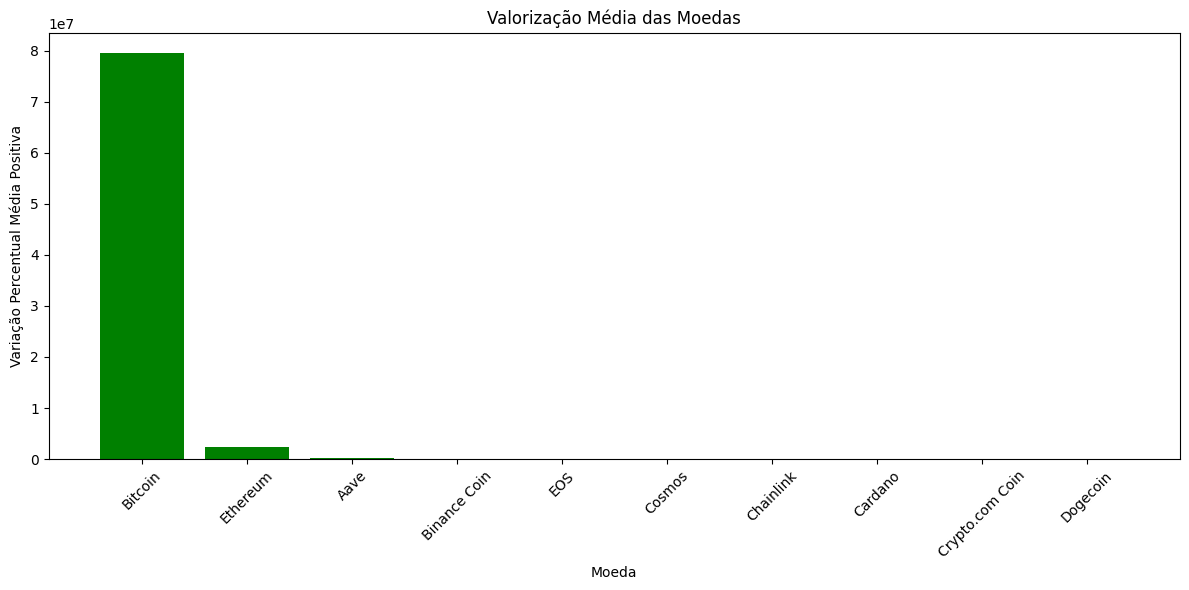

In [30]:
# Calculando a média da variação percentual positiva para cada moeda
media_variacao_moedas = df[df['variação_percentual'] > 0].groupby('nome')['variação_percentual'].mean()

# Ordenando as moedas pela média de variação percentual positiva
media_variacao_moedas = media_variacao_moedas.sort_values(ascending=False)

# Configurando o tamanho do gráfico
plt.figure(figsize=(12, 6))

# Criando o gráfico de barras
plt.bar(media_variacao_moedas.index, media_variacao_moedas.values, color='green')

# Rotulando os eixos
plt.xlabel('Moeda')
plt.ylabel('Variação Percentual Média Positiva')
plt.title('Valorização Média das Moedas')

# Rotacionando os rótulos do eixo x para melhor visualização
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

- Vemos que o Bitcoin durante a série histórica teve uma variação postiva muito a cima do que qualquer outra criptomoeda

[Voltar ao índice](#indice)

<a name='section_6'></a>
<font size=5, color= red> 6. Qual moeda se mostra menos interessante em relação à valorização pela análise da série histórica?

  - Vamos análisar o inverso, qual criptomoeda se mostrou menos interessante no decorrer da série histórica

In [31]:
# Encontrando a moeda com a menor média de variação percentual positiva
moeda_menos_interessante = df.groupby('nome')['variação_percentual'].mean().idxmin()

# Encontrando a média de variação percentual positiva dessa moeda
menor_media_variacao = df[df['nome'] == moeda_menos_interessante]['variação_percentual'].mean()

print(f"A moeda menos interessante em relação à valorização é {moeda_menos_interessante}.")
print(f"Ela teve uma média de variação percentual negativa de {menor_media_variacao:.2f}%.")

A moeda menos interessante em relação à valorização é Dogecoin.
Ela teve uma média de variação percentual negativa de -89.98%.


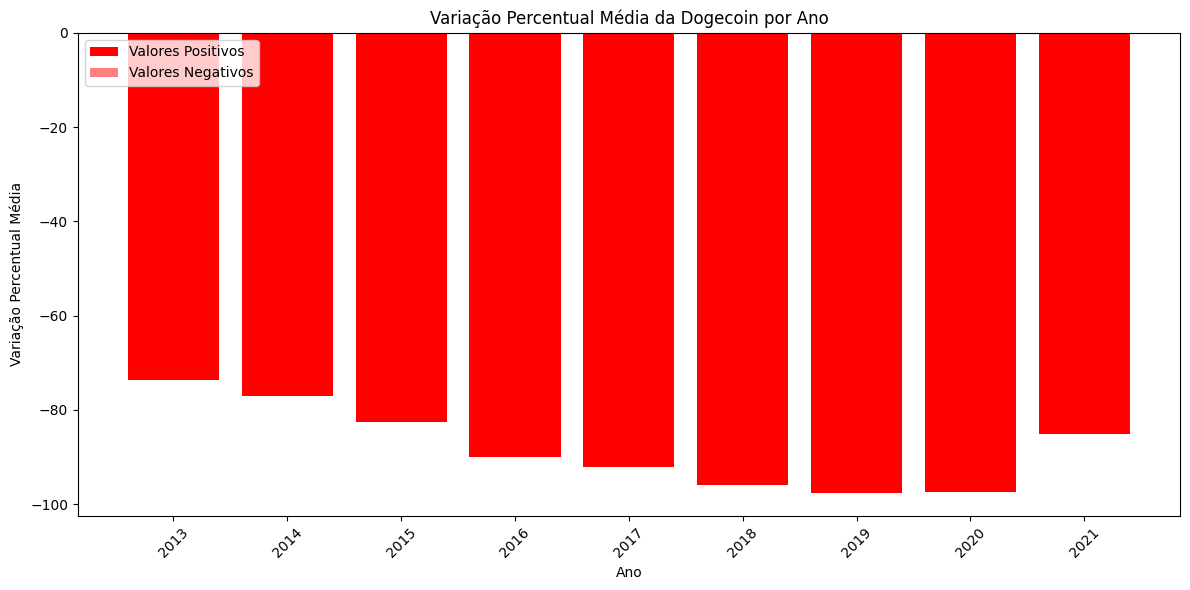

In [32]:
# Filtrando os dados apenas para as moedas menos interessantes (menor média de variação percentual positiva)
dados_moeda_menos_interessante = df[df['nome'] == moeda_menos_interessante].copy()

# Extraindo o ano da coluna 'data'
dados_moeda_menos_interessante['ano'] = dados_moeda_menos_interessante['data'].dt.year

# Agregando os dados por ano e calcular a média da variação percentual para cada ano
dados_agrupados = dados_moeda_menos_interessante.groupby('ano')['variação_percentual'].mean()

# Configurando o tamanho do gráfico
plt.figure(figsize=(12, 6))

# Criando um array de índices para os anos
anos = dados_agrupados.index

# Plotando os valores positivos em azul
plt.bar(anos, dados_agrupados, color=np.where(dados_agrupados >= 0, 'blue', 'red'), label='Valores Positivos')

# Destacando os valores negativos com uma cor diferente (vermelho)
plt.bar(anos, dados_agrupados, color='red', label='Valores Negativos', alpha=0.5)

# Definindo rótulos para as barras
plt.xticks(anos, rotation=45)

# Adicionando uma linha de base zero
plt.axhline(y=0, color='black', linestyle='--', linewidth=0.7)

# Rótulos dos eixos, título e legenda
plt.xlabel('Ano')
plt.ylabel('Variação Percentual Média')
plt.title(f'Variação Percentual Média da {moeda_menos_interessante} por Ano')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

[Voltar ao índice](#indice)

<a name='section_7'></a>
<font size=5, color= red> 7. Existe correlação entre os valores para todas as criptomoedas?

  - Verificando a correlação entre os valores para todas as criptomoedas

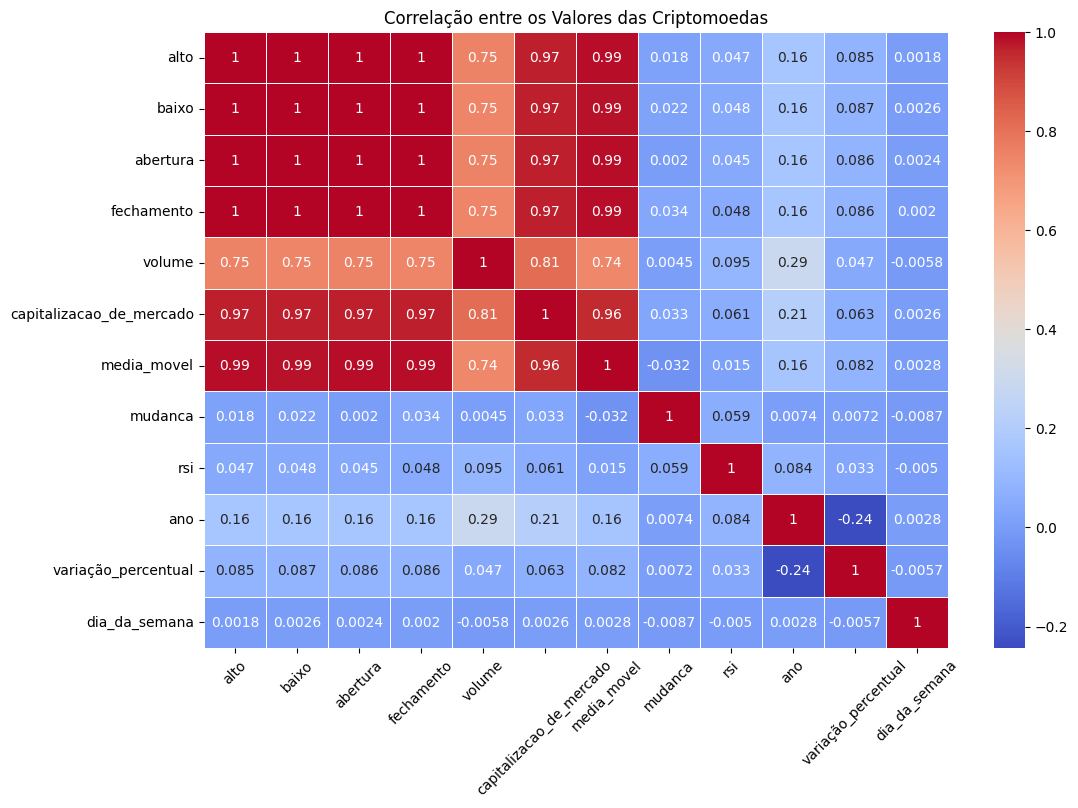

In [33]:
# Calculando a matriz de correlação
correlation_matrix = df.corr(numeric_only=True)

# Configurando o tamanho do gráfico
plt.figure(figsize=(12, 8))

# Criando um mapa de calor para visualizar a matriz de correlação
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)

# Rotacionando as legendas do eixo x
plt.xticks(rotation=45)

# Definindo o título do gráfico
plt.title('Correlação entre os Valores das Criptomoedas')

plt.show()

- Observamos que existe uma alta correlação entre os valores das criptomoedas, o que significa que os preços tendem a se mover na mesma direção. Assim essa descoberta tem implicações importantes para os investidores em criptomoedas. A alta correlação significa que os investidores precisam ter cuidado ao diversificar seus investimentos em várias criptomoedas, pois o movimento de preço de uma pode afetar as outras.

[Voltar ao índice](#indice)

<a name='section_8'></a>
<font size=5, color= red> 8. Qual é a volatilidade média das criptomoedas ao longo do tempo e como essa volatilidade se compara entre as diferentes moedas?

  - Vamos verificar a volatildiade média das criptmoedas ao longo do tempo e ver como ela se compara entre as diferentes moedas

In [34]:
# Calculando a volatilidade para cada criptomoeda
volatilidade_media = df.groupby('nome')['variação_percentual'].mean()

# Formatandondo os valores em porcentagem
volatilidade_media = volatilidade_media.map('{:.2f}%'.format)

print(volatilidade_media)

nome
Aave                 128728.98%
Binance Coin          69922.16%
Bitcoin            74165016.94%
Cardano                 402.22%
Chainlink             14223.23%
Cosmos                17421.02%
Crypto.com Coin         188.47%
Dogecoin                -89.98%
EOS                   21017.63%
Ethereum            1695264.46%
Name: variação_percentual, dtype: object


- Agora utilizando o calculo vamos visualizar como ficou a volatilidade

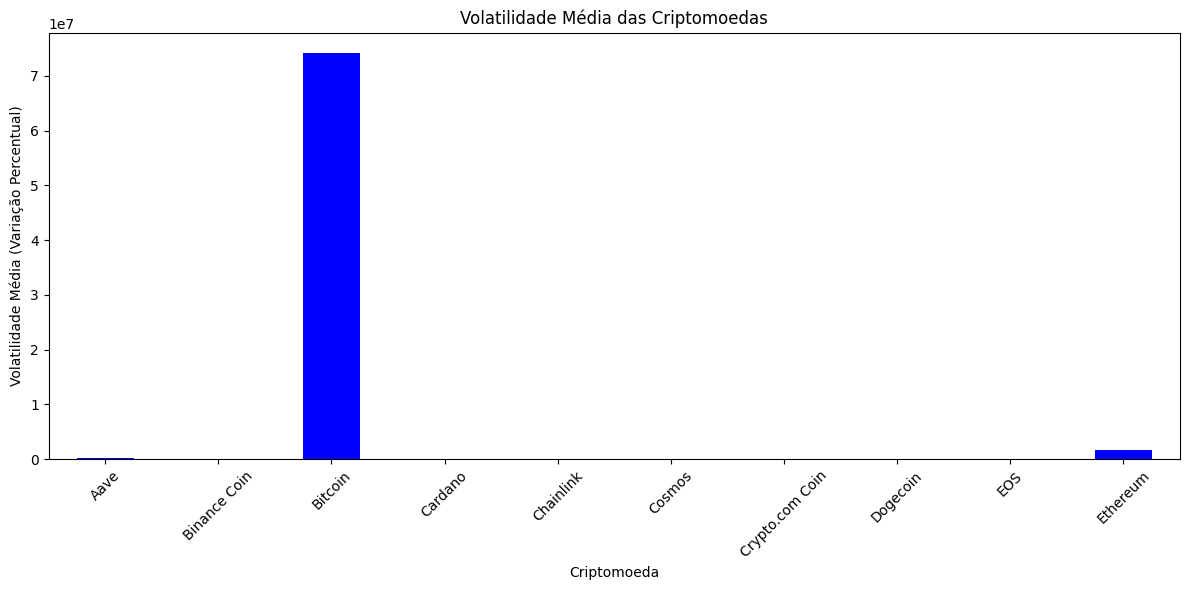

In [35]:
# Removendo o símbolo '%' e converta os valores para números
volatilidade_media_numeric = volatilidade_media.str.rstrip('%').astype(float)

# Criando um gráfico de barras
plt.figure(figsize=(12, 6))
volatilidade_media_numeric.plot(kind='bar', color='blue')

# Rotacionando as legendas do eixo x
plt.xticks(rotation=45)

# Adicionando rótulos e título
plt.xlabel('Criptomoeda')
plt.ylabel('Volatilidade Média (Variação Percentual)')
plt.title('Volatilidade Média das Criptomoedas')

plt.tight_layout()
plt.show()

- As criptomoedas mostram diferenças significativas em termos de volatilidade. Por exemplo, o Bitcoin é notavelmente volátil, com uma variação percentual média extremamente alta.
-  Algumas criptomoedas, como Ethereum, Aave e Binance Coin, têm variações percentuais médias positivas significativas, o que pode indicar um histórico geral de valorização. Por outro lado, o Dogecoin tem uma variação percentual média negativa, o que sugere um histórico geral de desvalorização.

[Voltar ao índice](#indice)


<a name='section_9'></a>
<font size=5, color= red> 9. Existe alguma relação entre a capitalização de mercado de uma criptomoeda e sua tendência de valorização? Por exemplo, as criptomoedas com maior capitalização de mercado tendem a se valorizar mais do que as de menor capitalização?

  - Verificando a relação entre a capitalização de mercado e sua tendencia de valorização

In [36]:
# Calculando a média da variação percentual para cada criptomoeda
media_variacao_percentual = df.groupby('nome')['variação_percentual'].mean()

# Calculando a média da capitalização de mercado para cada criptomoeda
media_capitalizacao = df.groupby('nome')['capitalizacao_de_mercado'].mean()

# Criando um DataFrame com as médias calculadas
df_media = pd.DataFrame({'Média de Variação Percentual': media_variacao_percentual, 'Média de Capitalização de Mercado': media_capitalizacao})

# Calculando a correlação entre as duas variáveis
correlacao = df_media['Média de Variação Percentual'].corr(df_media['Média de Capitalização de Mercado'])

print(f"Correlação entre Média de Variação Percentual e Média de Capitalização de Mercado: {correlacao}")

Correlação entre Média de Variação Percentual e Média de Capitalização de Mercado: 0.953416537947103


- Visualizando a correlação

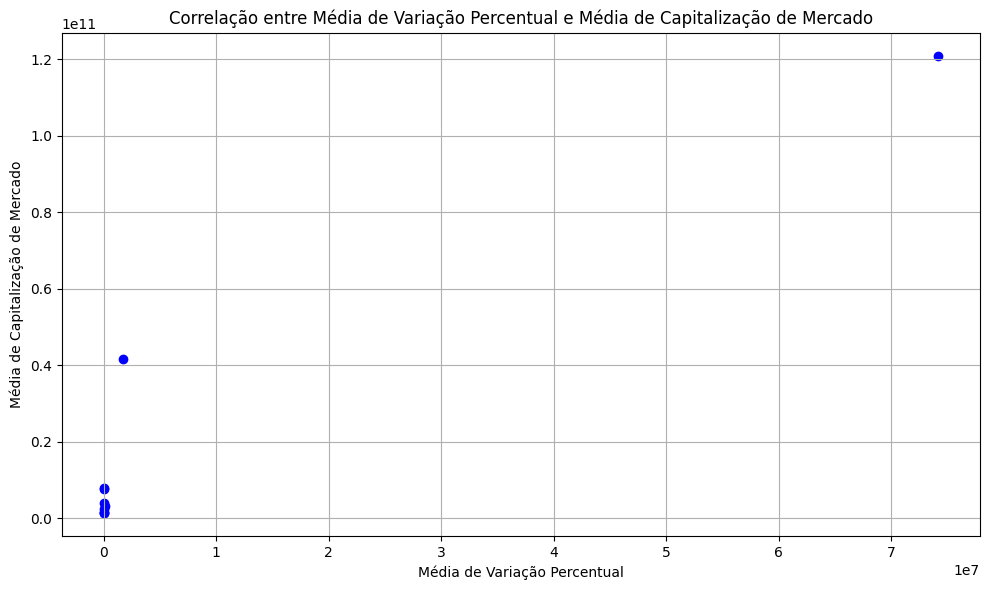

In [37]:
plt.figure(figsize=(10, 6))
plt.scatter(df_media['Média de Variação Percentual'], df_media['Média de Capitalização de Mercado'], color='blue', marker='o')
plt.xlabel('Média de Variação Percentual')
plt.ylabel('Média de Capitalização de Mercado')
plt.title('Correlação entre Média de Variação Percentual e Média de Capitalização de Mercado')
plt.grid(True)
plt.tight_layout()
plt.show()

- A correlação entre a média de variação percentual e a média de capitalização de mercado das criptomoedas é de aproximadamente 0.9534, o que indica uma correlação positiva forte entre essas duas variáveis. Assim tendo uma tendência de que as criptomoedas com maior capitalização de mercado tenham uma maior média de variação percentual, o que sugere que elas têm uma tendência a se valorizar mais do que as criptomoedas de menor capitalização.

[Voltar ao índice](#indice)

<a name='section_10'></a>
<font size=5, color= red> 10. Verificando os maiores valores de fechamento do bitcoin em cada ano.

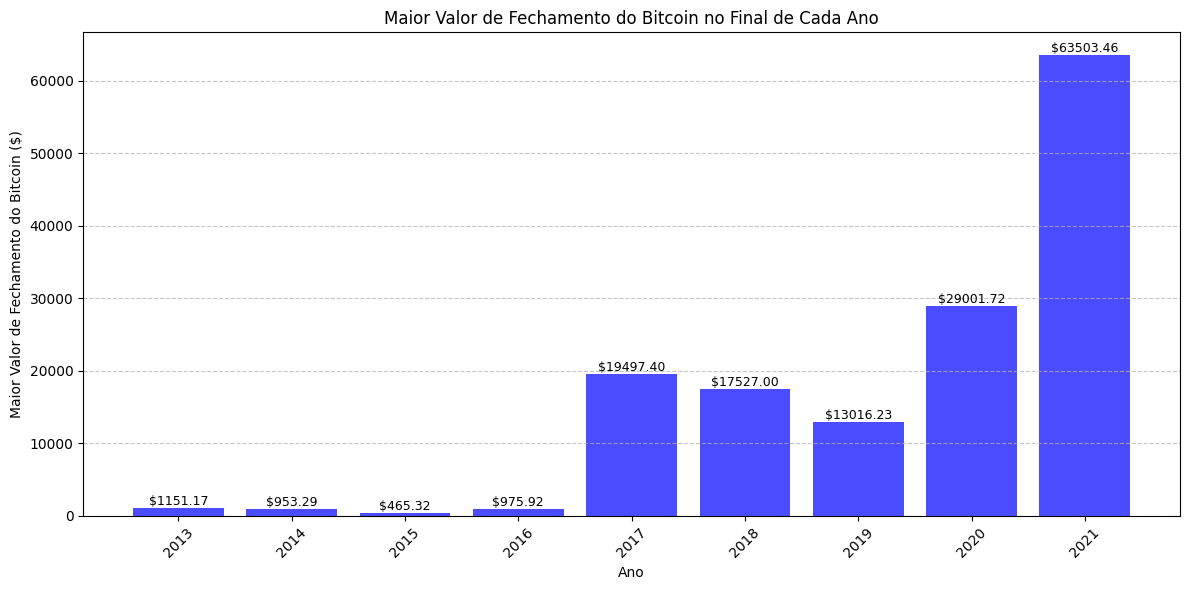

In [38]:
# Extraindo o ano da coluna 'data'
df['ano'] = df['data'].dt.year

# Agrupando os dados por ano e obtenha o preço de fechamento máximo de cada ano
dados_agrupados = df.groupby('ano')['fechamento'].max()

# Criando um gráfico de barras para mostrar o maior valor de fechamento do Bitcoin em cada ano
plt.figure(figsize=(12, 6))
plt.bar(dados_agrupados.index, dados_agrupados, color='blue', alpha=0.7)

# Definindo rótulos para as barras
plt.xticks(anos, rotation=45)

plt.xlabel('Ano')
plt.ylabel('Maior Valor de Fechamento do Bitcoin ($)')
plt.title('Maior Valor de Fechamento do Bitcoin no Final de Cada Ano')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adicionando legendas no topo de cada barra com o símbolo do dólar
for ano, valor in zip(dados_agrupados.index, dados_agrupados):
    plt.text(ano, valor, f'${valor:.2f}', ha='center', va='bottom', fontsize=9, color='black')

plt.tight_layout()
plt.show()

<a name='section_11'></a>
<font size=5, color= red> Dashboard.

![dashboard](https://github.com/Fernando-cfs/criptomoedas/blob/main/prints_dashboard/analise1.jpg?raw=1)